In [15]:
#import data from csv
import pandas as pd
import numpy as np

In [17]:
filename = 'C:/Users/karen/Downloads/UIC/IDS-566-master/assignment3/songdata.csv/songdata.csv'
songlist = pd.read_csv(filename,sep=',')
songlist.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [19]:
#create dataset for text of the songs only
song_text = songlist['text']
song_text.head(5)

0    Look at her face, it's a wonderful face  \nAnd...
1    Take it easy with me, please  \nTouch me gentl...
2    I'll never know why I had to go  \nWhy I had t...
3    Making somebody happy is a question of give an...
4    Making somebody happy is a question of give an...
Name: text, dtype: object

## vectorize the text by tf-idf vectorizer

In [260]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = TfidfVectorizer(analyzer = 'word',min_df=5,stop_words='english')
songtext_tfidf= vect.fit_transform(song_text)
print(songtext_tfidf.shape)

(57650, 22557)


## Clustering using Kmeans

In [31]:
from sklearn.cluster import KMeans

In [149]:
#apply clustering algorithm with 3 clusters 
kmeans = KMeans(3)

In [151]:
clusters = kmeans.fit_predict(songtext_tfidf)

In [152]:
#centroid and shape of the clusters
print(kmeans.cluster_centers_.shape)
kmeans.cluster_centers_

(3, 22557)


array([[  0.00000000e+00,   1.24011804e-04,   0.00000000e+00, ...,
          0.00000000e+00,   2.04855721e-05,   0.00000000e+00],
       [  4.69000169e-05,   2.10595148e-04,   2.36498445e-05, ...,
          3.73770586e-05,   2.22388738e-05,   1.61242631e-05],
       [  8.42560000e-06,   1.07959569e-04,   7.56900770e-06, ...,
          0.00000000e+00,   1.69860617e-05,   0.00000000e+00]])

In [153]:
centroid = kmeans.cluster_centers_
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances

In [49]:
#closest_point = pairwise_distances_argmin_min(centroid, songtext_tfidf)
#closest_point

(array([13907,  5342, 27550], dtype=int64),
 array([ 0.9583766 ,  0.87893229,  0.76692914]))

In [154]:
centroid = pd.DataFrame(centroid).head(10)
np.array(centroid)[1,:].shape

(22557,)

In [155]:
distance = pairwise_distances(songtext_tfidf,centroid)
distance = pd.DataFrame(distance,columns=['class1','class2','class3'])

In [156]:
#a quick preview on data
distance.head(10)

,class1,class2,class3
0,1.016712,0.985588,0.989541
1,1.005364,0.979175,0.970434
2,1.016382,0.995063,1.007492
3,1.019192,1.000332,1.017212
4,1.013733,0.998712,1.014577
5,1.031921,0.992976,1.000082
6,1.029170,0.989838,1.006669
7,0.998925,0.974422,0.978089
8,1.008391,0.979841,0.977323
9,1.026206,0.992362,0.999633


In [157]:
def top5_document(cluster):
    'extract the top 5 document in each cluster that are closest to the centroid from kmeans'
    required_document = distance.sort_values(cluster,ascending=True).head(5)
    top5_index = np.array(required_document.index)
    return songlist.iloc[top5_index]

In [162]:
top5_document('class1')

,artist,song,link,text
27550,Chris Brown,Love Them Girls,/c/chris+brown/love+them+girls_20905278.html,I know why you want love in the middle of the ...
12310,Madonna,It's So Cool,/m/madonna/its+so+cool_20853254.html,"It's so hard to be someone, \nIt's so hard to..."
19864,U2,Red Light,/u/u2/red+light_20141619.html,I talk to you \nYou walk away \nYou're still...
1175,Beach Boys,I Do Love You,/b/beach+boys/i+do+love+you_20013653.html,When you say you do \nMakes me want to spend ...
7060,Gloria Gaynor,No One Can Love You More,/g/gloria+gaynor/no+one+can+love+you+more_2028...,"Give you love, give you love \nI'm gonna give..."


In [163]:
top5_document('class2')

,artist,song,link,text
4540,Drake,Take Care,/d/drake/take+care_20975670.html,Know you've been hurt by someone else \nI can...
13907,New Order,Krafty,/n/new+order/krafty_10191859.html,Some people get up at the break of day \nGott...
27707,Christina Aguilera,Love For All Seasons,/c/christina+aguilera/love+for+all+seasons_200...,Hey there boy did ya happen to know \nWhereve...
17260,Reba Mcentire,Love Will Find Its Way To You,/r/reba+mcentire/love+will+find+its+way+to+you...,"Another morning, another day in your life \nW..."
26338,Bonnie Raitt,You Told Me Baby,/b/bonnie+raitt/you+told+me+baby_20022575.html,Told me baby \nYou were just too tired to try...


In [164]:
top5_document('class3')

,artist,song,link,text
5342,Eric Clapton,Don't Know Why,/e/eric+clapton/dont+know+why_20051351.html,"You say you want everything good for me, \nBu..."
33148,Freestyle,Im Gonna Love You,/f/freestyle/im+gonna+love+you_20583215.html,Baby baby baby \nI've been lookin' at you loo...
26445,Britney Spears,Don't Let Me Be The Last To Know,/b/britney+spears/dont+let+me+be+the+last+to+k...,My friends say you're so into me \nAnd that y...
41875,Little Mix,They Just Don't Know You,/l/little+mix/they+just+dont+know+you_21093047...,(JADE) \nDaddy doesn't think \nThat you'll b...
41818,Lionel Richie,I Call It Love,/l/lionel+richie/i+call+it+love_20366523.html,I look at you \nYou look at me \n(You can't ...


Surprisingly, it is easy to find features like "love" in every class from the clustering. Howevevr, love could be about a sad story or happy story, with it between couples, family, and friendship. I cannot tell distinguish these after the clustering , since there are too many features in the model, which would gives so many noises in the modeling and the result can be controversial.

Using LSA for Dimension Reduction with 50 Components

In [165]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(50)
Z = lsa.fit_transform(songtext_tfidf)
Z.shape

(57650, 50)

access the components

In [166]:
print(lsa.components_.shape)
lsa.components_

(50, 22557)


array([[  1.16005255e-04,   7.14209025e-04,   2.81023981e-05, ...,
          2.21168395e-05,   8.92621127e-05,   1.27510651e-05],
       [ -1.99034008e-04,  -3.48064826e-04,  -2.45552317e-05, ...,
         -2.45616874e-05,   4.62336448e-05,   1.56807059e-05],
       [ -1.41274344e-04,  -2.92450209e-04,   4.11809775e-05, ...,
         -1.92486506e-05,  -1.51158229e-04,   4.56407217e-06],
       ..., 
       [ -3.42502341e-04,   7.45445167e-06,   1.01387863e-05, ...,
         -7.35402077e-05,  -1.38106692e-04,  -7.27249512e-05],
       [ -4.82308049e-05,   4.83546228e-04,  -4.88050405e-05, ...,
          1.15285052e-05,   2.71841270e-04,  -1.92882333e-05],
       [ -2.91859403e-05,  -3.08746204e-04,   1.14501633e-04, ...,
          9.90155935e-05,   3.30730703e-04,  -4.86829219e-05]])

print out top 5 features per component

In [171]:
vocab = np.array(vect.get_feature_names())
word = []
for i in range(Z.shape[1]):
    order = np.abs(lsa.components_[i]).argsort()[::-1]  #return the index that sort the array
    word.append(vocab[order[:]])
    print(vocab[order[:5]])
    

['love' 'don' 'know' 'll' 'just']
['love' 'don' 'got' 'heart' 'gonna']
['oh' 'baby' 'yeah' 'll' 'time']
['oh' 'don' 'want' 'baby' 'know']
['baby' 'don' 'oh' 'want' 'know']
['ll' 'la' 'baby' 'got' 'yeah']
['la' 'll' 'got' 'baby' 'yeah']
['want' 'don' 'yeah' 'know' 've']
['yeah' 'll' 'let' 'gonna' 'want']
['let' 'll' 'want' 'don' 'yeah']
['got' 've' 'let' 'yeah' 'don']
['gonna' 'yeah' 've' 'know' 'ain']
['gonna' 'll' 'christmas' 'like' 'yeah']
['christmas' 'like' 'don' 'chorus' 've']
['christmas' 'time' 'don' 'come' 'just']
['know' 'chorus' 'christmas' 'away' 'hey']
['come' 'know' 'hey' 'home' 'don']
['hey' 'like' 'say' 'chorus' 'girl']
['time' 'chorus' 'hey' 'heart' 'come']
['chorus' 'know' 'man' 'come' 'wanna']
['time' 'say' 'away' 'hey' 'way']
['hey' 'girl' 'like' 'feel' 'little']
['chorus' 'need' 'hey' 'wanna' 'life']
['night' 'heart' 'come' 'tonight' 'wanna']
['wanna' 'need' 'heart' 'just' 'time']
['away' 'say' 'girl' 'night' 'tonight']
['away' 'need' 'way' 've' 'heart']
['home' 'ne

In [170]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [174]:
word = pd.DataFrame(word)
word.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22547,22548,22549,22550,22551,22552,22553,22554,22555,22556
0,love,don,know,ll,just,oh,baby,want,like,ve,...,bigyan,tangis,melihat,sendiri,mimpi,depan,tinggi,janji,menunggu,namun
1,love,don,got,heart,gonna,like,yeah,ain,just,man,...,scripted,ibang,invitin,supports,papaya,pathways,douse,roams,moisture,incense
2,oh,baby,yeah,ll,time,ve,life,away,day,want,...,mera,croix,ethel,dominus,clef,homme,bi,feigning,wrung,malayo
3,oh,don,want,baby,know,ll,day,night,need,love,...,goof,nouveau,yin,yankees,ingin,lovestruck,squealing,towing,witted,hairs
4,baby,don,oh,want,know,got,gonna,come,yeah,ain,...,disowned,morality,isipin,hookin,singe,hoh,cerebellum,quay,equilibrium,inang
5,ll,la,baby,got,yeah,love,let,like,ain,come,...,cabbie,monstrous,salty,guesses,seagull,jackass,scavengers,invaded,stylish,bahama
6,la,ll,got,baby,yeah,let,ve,ain,want,oh,...,randolph,sensuality,mase,perform,asa,constrained,smearing,frida,apprehensive,nullify
7,want,don,yeah,know,ve,let,baby,got,christmas,come,...,smoldering,600,raving,feenin,wuz,noted,sukey,repercussions,arent,mirages
8,yeah,ll,let,gonna,want,baby,ve,hey,know,life,...,modest,baat,metro,anvil,peux,worthless,hubcaps,mu,attends,asylum
9,let,ll,want,don,yeah,ve,come,like,got,gonna,...,grazie,vento,stockholm,mofo,smirk,gallon,chews,biggy,cancerous,speculate


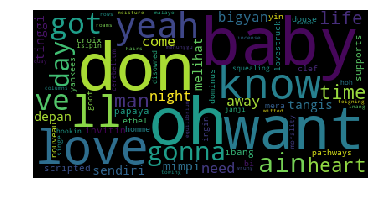

In [179]:
my_wordcloud = WordCloud().generate(str(word[:5]))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

From the word cloud shown from the above, the top feature for each component is "baby" , following by "don't"' , "love","oh","want". From the LSA dimension reduction, we can extract the top feature from thesee songs, which is "baby". From these song, "baby" would be a word for love, romance. However, the feature "oh" cannot give us enough informtaion, as well as "don't" in the song text. On the other side, if we combine these features together, first, "oh" usually gives us a way to express the feeling in the song, "don't " is a more negative word in most cases, that is to say, these songs with this feature might express the sad feeling about love story.

## Run clustering on after LSA for 2-10 clusters 

In [181]:
inertia = []
for i in range(2,11):
    kmeans = KMeans(i)
    clusters = kmeans.fit_predict(Z)
    inertia.append(kmeans.inertia_)

print(inertia)

[7169.276030290991, 6952.2254435315608, 6763.6711566101803, 6603.0528558812675, 6451.5544688565469, 6321.0996114513364, 6241.0948635228433, 6143.8233341683281, 6022.5925670441293]


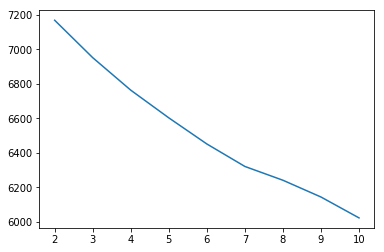

In [182]:
#visualize the result
%matplotlib inline
plt.plot(range(2,11),inertia)


According to the graph, there is no clear elbow point in the line, which might give several signals: there is only 1 cluster in the data after the dimension reduction under LSA ; I can try to minimiaze the inertia by adding more clusters as many as I can and then I would choose 10 for the best number of clusters for the modeling. Even I increase the clusters even larger to 20 clusters, the inertia is keep on decreasing without any limits as a result, 10 clusters might be the best result under the situation.

In [183]:
inertia_2 = []
for i in range(2,20):
    kmeans = KMeans(i)
    clusters = kmeans.fit_predict(Z)
    inertia_2.append(kmeans.inertia_)

print(inertia_2)

[7169.2757906553015, 6952.2234756303269, 6763.6685169976481, 6630.7038552807653, 6451.5573974850004, 6339.8887198667398, 6235.4225261925221, 6142.1332330887017, 6016.0294893854598, 5953.3779440246662, 5835.3335066455184, 5761.9336834134256, 5666.9578952693291, 5622.2720979503256, 5536.9697244333947, 5468.1428299561976, 5432.9775467358959, 5349.4342399704974]


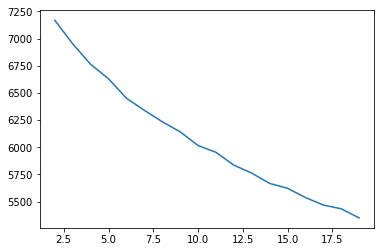

In [187]:
#visualize the result
%matplotlib inline
plt.plot(range(2,20),inertia_2)
plt.show()

train the data into 10 clusters from last question

In [188]:
kmeans_10 = KMeans(10)
cluster_10 = kmeans_10.fit_predict(Z)
centroid_10c = kmeans_10.cluster_centers_


In [261]:
distance_10c.shape

(57650, 10)

In [193]:
distance_10c = pairwise_distances(Z,centroid_10c)
distance_10c = pd.DataFrame(distance_10c,columns=range(1,11))
distance_10c.head(10)

,1,2,3,4,5,6,7,8,9,10
0,0.551727,0.457212,0.866465,0.540276,0.549454,0.685507,0.466077,0.508288,0.472872,0.562196
1,0.630038,0.556879,0.915733,0.619631,0.505706,0.733949,0.563101,0.569963,0.567083,0.588689
2,0.349512,0.215330,0.745982,0.286722,0.343465,0.521963,0.173601,0.295795,0.206598,0.365842
3,0.346663,0.191112,0.735536,0.250722,0.325299,0.511935,0.122322,0.283529,0.207312,0.321809
4,0.346325,0.191128,0.737472,0.237358,0.326895,0.514746,0.133193,0.283154,0.209848,0.320466
5,0.414180,0.311951,0.780988,0.412054,0.400183,0.573608,0.279685,0.366652,0.260059,0.384863
6,0.386413,0.208036,0.757494,0.356967,0.359712,0.528928,0.184476,0.310722,0.254828,0.381319
7,0.504971,0.378127,0.826841,0.468142,0.434459,0.617922,0.395248,0.453576,0.418999,0.467067
8,0.417654,0.353813,0.822021,0.457300,0.463775,0.637911,0.370596,0.413537,0.376782,0.483086
9,0.406376,0.373067,0.806525,0.452882,0.456925,0.605595,0.340439,0.421533,0.377976,0.330802


In [194]:
def top5_document(cluster,distance):
    'extract the top 5 document in each cluster that are closest to the centroid from kmeans'
    required_document = distance.sort_values(cluster,ascending=True).head(5)
    top5_index = np.array(required_document.index)
    return songlist.iloc[top5_index]


In [195]:
top5_document(1,distance_10c)

,artist,song,link,text
1990,Britney Spears,Mega Mix,/b/britney+spears/mega+mix_20593383.html,I wanna see you move \nCan you turn me up a l...
31624,Enrique Iglesias,Addicted,/e/enrique+iglesias/addicted_10107392.html,Have I told you how good \nIt feels to be me ...
7071,Gordon Lightfoot,Baby Step Back,/g/gordon+lightfoot/baby+step+back_20061631.html,Now it looks to me like the same old place \n...
6238,Flo-Rida,Ruff Me Up,/f/flo+rida/ruff+me+up_21032478.html,Baby you don't know the girl that's comin' out...
32662,Flo-Rida,Whistle,/f/flo+rida/whistle_21015823.html,"Can you blow my whistle baby, whistle baby \n..."


In [298]:
top5_document(1,distance_10c)

,artist,song,link,text
1990,Britney Spears,Mega Mix,/b/britney+spears/mega+mix_20593383.html,I wanna see you move \nCan you turn me up a l...
31624,Enrique Iglesias,Addicted,/e/enrique+iglesias/addicted_10107392.html,Have I told you how good \nIt feels to be me ...
7071,Gordon Lightfoot,Baby Step Back,/g/gordon+lightfoot/baby+step+back_20061631.html,Now it looks to me like the same old place \n...
6238,Flo-Rida,Ruff Me Up,/f/flo+rida/ruff+me+up_21032478.html,Baby you don't know the girl that's comin' out...
32662,Flo-Rida,Whistle,/f/flo+rida/whistle_21015823.html,"Can you blow my whistle baby, whistle baby \n..."


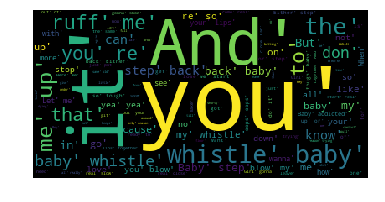

In [299]:
tokenize_text(1)

In [196]:
top5_document(2,distance_10c)

,artist,song,link,text
8138,Idina Menzel,Defying Gravity,/i/idina+menzel/defying+gravity_20775501.html,"Elphaba, why couldn't you have stayed calm, fo..."
20418,Utopia,Shinola,/u/utopia/shinola_20142695.html,"I have been ringing your doorbell, \nBut you ..."
42925,Marillion,The Last Straw,/m/marillion/the+last+straw_20088847.html,"(fish, steve rothery, mark kelly, pete trewava..."
11892,Loretta Lynn,Always Wanting You,/l/loretta+lynn/always+wanting+you_20702976.html,Always wanting you but never having you \nMak...
54016,Train,You Can Finally Meet My Mom,/t/train/you+can+finally+meet+my+mom_21018368....,Don't cry when I die \nWhen it's my time I pr...


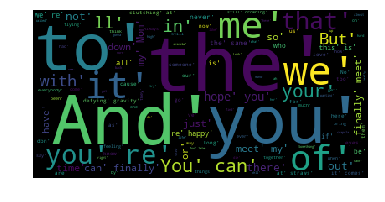

In [297]:
tokenize_text(2)

In [197]:
top5_document(3,distance_10c)

,artist,song,link,text
19410,Tom Jones,Spanish Harlem,/t/tom+jones/spanish+harlem_20293452.html,There is a rose in Spanish Harlem \nA red ros...
22858,Ace Of Base,L'amour,/a/ace+of+base/lamour_20003656.html,La la l'amour \nGotta a lotta la la l'amour ...
43785,Michael Jackson,Just Friends,/m/michael+jackson/just+friends_20092847.html,(with Carole Bayer Sager) \n \nYou and me \...
27810,Christmas Songs,Dominick The Donkey,/c/christmas+songs/dominick+the+donkey_2067429...,"Hey! Chingedy ching, \n(Hee-haw, hee-haw) \n..."
6295,Foo Fighters,Kids In America,/f/foo+fighters/kids+in+america_21097701.html,Looking out a dirty old window \nDown below t...


In [279]:
top5_document(4,distance_10c)

,artist,song,link,text
9089,James Taylor,I Will Follow,/j/james+taylor/i+will+follow_20069192.html,"Yonder mountain so high, \nI can't make it al..."
50998,Robbie Williams,Supreme,/r/robbie+williams/supreme_20116793.html,Oh it seemed forever stopped today \nAll the ...
17113,Rascal Flatts,This Everyday Love,/r/rascal+flatts/this+everyday+love_20114296.html,Can't get enough of this everyday love \nCan'...
3014,Chuck Berry,Bound To Lose,/c/chuck+berry/bound+to+lose_20514597.html,Looks like I'll go on through my life bound in...
4405,Donna Summer,Love's Unkind,/d/donna+summer/loves+unkind_10087856.html,Well I seem him every morning in the schoolyar...


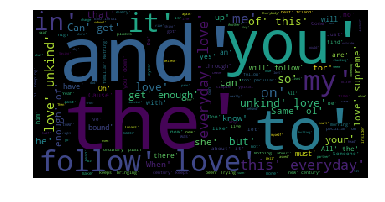

In [296]:
tokenize_text(4)

In [281]:
top5_document(5,distance_10c)


,artist,song,link,text
26634,Bruno Mars,Before It Explodes,/b/bruno+mars/before+it+explodes_20912120.html,"It's not a question of love, \nCause our love..."
51613,Sia,Lentil,/s/sia/lentil_20662896.html,"You were waiting for me, adore me, you saw me ..."
15622,Paul Simon,"Pigs, Sheep And Wolves",/p/paul+simon/pigs+sheep+wolves_20105984.html,Big and fat \nPig's supposed to look like tha...
37143,Iron Maiden,Bring Your Daughter To The Slaughter,/i/iron+maiden/bring+your+daughter+to+the+slau...,"Honey its getting close to midnight, and all t..."
16013,Phineas And Ferb,Let's Take A Rocket Ship To Space,/p/phineas+and+ferb/lets+take+a+rocket+ship+to...,Let's take a rocket ship to space \nI hear it...


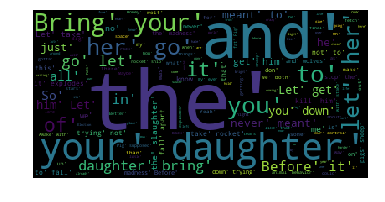

In [295]:
tokenize_text(5)

In [282]:
top5_document(6,distance_10c)


,artist,song,link,text
44046,Miley Cyrus,My Sad Christmas Song,/m/miley+cyrus/my+sad+christmas+song_21105348....,[Intro] \nFa lalalala \n \n[Verse 1] \nThi...
25965,Bob Rivers,Shoppin' Around For A Christmas Tree,/b/bob+rivers/shoppin+around+for+a+christmas+t...,Shoppin' around for a Christmas tree \nAt the...
44525,Moody Blues,White Christmas,/m/moody+blues/white+christmas_20340434.html,I'm dreaming of a white Christmas \nJust like...
35511,Harry Belafonte,We Wish You A Merry Christmas,/h/harry+belafonte/we+wish+you+a+merry+christm...,We wish you a merry Christmas \nWe wish you a...
107,ABBA,We Wish You A Merry Christmas,/a/abba/we+wish+you+a+merry+christmas_20755361...,We wish you a merry Christmas \nWe wish you a...


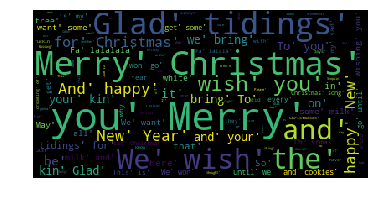

In [293]:
tokenize_text(6)

In [283]:
top5_document(7,distance_10c)


,artist,song,link,text
24200,Annie,N.Y.C.,/a/annie/nyc_20647083.html,Warbucks \n \nWhat is it about you \nYou're...
36207,Horrible Histories,Hieroglyphics,/h/horrible+histories/hieroglyphics_20914094.html,"Settle down, class \nNow you've passed \nYou..."
8546,Insane Clown Posse,Crop Circles,/i/insane+clown+posse/crop+circles_20383423.html,The sun rises and sets on time every day of th...
55419,Wanda Jackson,Reuben James,/w/wanda+jackson/reuben+james_20301889.html,Reuben James in my song you'll live again \nA...
48342,Phish,Guelah Papyrus,/p/phish/guelah+papyrus_20108410.html,Aboard a craft bereft of oar \nI rowed upstre...


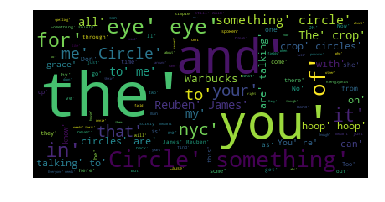

In [292]:
tokenize_text(7)

In [284]:
top5_document(8,distance_10c)


,artist,song,link,text
52274,Stevie Wonder,Cash In Your Face,/s/stevie+wonder/cash+in+your+face_20131791.html,You just could not know how long we tried \nT...
41500,Leo Sayer,Rumours,/l/leo+sayer/rumours_20718526.html,) \nI heard some things about you \nI can't ...
49449,Queen Latifah,Wrath Of My Madness,/q/queen+latifah/wrath+of+my+madness_10237180....,My mellow Latee was kicking flavor \nThe R.E....
18407,Rush,Lock And Key,/r/rush/lock+key_20120083.html,I don't want to face \nThe killer instinct \...
28508,Cyndi Lauper,Dear John,/c/cyndi+lauper/dear+john_20035126.html,Dear John \nWhat's wrong? \nWhy can't you ju...


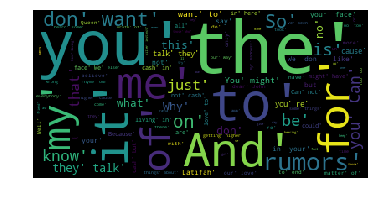

In [291]:
tokenize_text(8)

In [285]:
top5_document(9,distance_10c)


,artist,song,link,text
7284,Gucci Mane,Heavy,/g/gucci+mane/heavy_20864694.html,"Gucci, Gucci \nWhats up Corey \nBack in the ..."
5680,Everlast,Shroomz Pt. Ii,/e/everlast/shroomz+pt+ii_20705975.html,"[Everlast] \nOh this tastes like shit \nOh, ..."
22280,Youngbloodz,Sean Paul (Get 'em Crunk),/y/youngbloodz/sean+paul+get+em+crunk_20919252...,"Yeah yeah, yeah yeah, feel dat trend now, yeah..."
49438,Queen Latifah,Nuff' Of The Ruff' Stuff',/q/queen+latifah/nuff+of+the+ruff+stuff_201127...,Get funky with it \nI told you before: you bu...
9222,Jennifer Lopez,Cherry Pie,/j/jennifer+lopez/cherry+pie_10148252.html,Well swingin' on the front porch swingin' on t...


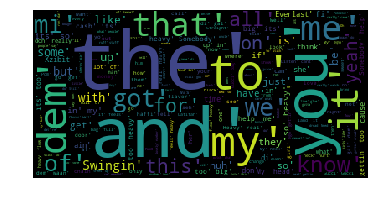

In [290]:
tokenize_text(9)

In [288]:
top5_document(10,distance_10c)


,artist,song,link,text
52878,The Temptations,Lady Soul,/t/temptations/lady+soul_20233769.html,Oh \nOh wo oh wo oh wo oh wo \nOh wo oh wo o...
52110,Status Quo,In The Army Now,/s/status+quo/in+the+army+now_20129827.html,A vacation in the foreign land \nUncle Sam do...
5033,Elvis Presley,Danny,/e/elvis+presley/danny_20049610.html,My name should be trouble \nMy name should be...
26691,Bryan White,So Much For Pretending,/b/bryan+white/so+much+for+pretending_20025774...,Straight out of some story \nYou walk in in a...
4373,Donna Summer,Autumn Changes,/d/donna+summer/autumn+changes_20042249.html,This love of ours \nIs gradually fading \nSo...


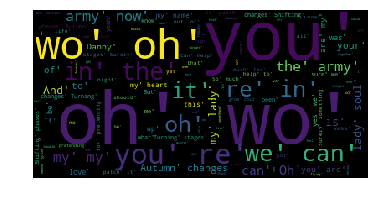

In [289]:
tokenize_text(10)

In [245]:
#class 1 text processing for wordcloud visualization
regexp_token = '\w\w+'
pattern_token = re.compile(regexp_token, re.UNICODE | re.IGNORECASE)
word_1 = np.array(top5_document(1,distance_10c)['text'])
wordset_1 = []
for line in word_1:
    tokens = pattern_token.findall(line)
    for words in tokens:
        if len(words)>3: #'the','a','the','and' roughly filter those meaningless words from the text
            
            wordset_1.append(words)      


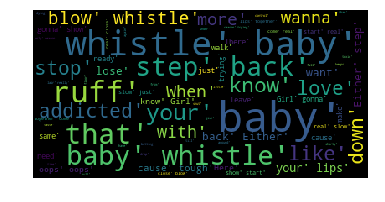

In [246]:
my_wordcloud = WordCloud().generate(str(wordset_1))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()


In [275]:
def tokenize_text(cluster):
    'extract the text from the top5 document in required cluster, tokenize into word and visualize by wordcloud'
    regexp_token = '\w\w+'
    pattern_token = re.compile(regexp_token, re.UNICODE | re.IGNORECASE)
    word = np.array(top5_document(cluster,distance_10c)['text'])
    wordset = []
    for line in word:
        tokens = pattern_token.findall(line)
        
        for unit in tokens: 
            if len(unit_word)>3 :
                wordset.append(unit)
            
    
    my_wordcloud= WordCloud().generate(str(wordset))
    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.show()


I will start with the cluster that are most obvious from the clustering after LSA. After visualizing text the result of the top 5 document Cluster 6, the most most used are "Merry Christmas", "New Year","wish". Therefore, for class 6 , the songs are more about festival such as Christmas and New Year. 

Secondly,the firsts class, more romantic words are shown, such as "baby","whistle","lip" therefore, a theme of "Romantic" would be given to this cluster.

As for cluster 3, what comes first to my eyes are "kids","we","la","hee-haw" and some other words that represents sound effect or a foreign language. 

Cluster 2

# reduce to 2 components and find 3 clusters in data and plot scatter with different colors


In [340]:
lsa_2 = TruncatedSVD(2)
Z= lsa_2.fit_transform(songtext_tfidf)
Z.shape

(57650, 2)

In [348]:
kmeans_3 = KMeans(3)
cluster = kmeans_3.fit_predict(Z)
centroid_2 = kmeans_3.cluster_centers_
new_distance = pd.DataFrame(pairwise_distances(Z,centroid_2),columns=range(1,4))



In [378]:
lsa_2.components_.shape

(2, 22557)

Access the features per component and visualize the result in word cloud

In [381]:
word_set = []
for i in range(Z.shape[1]):
    order = np.abs(lsa_2.components_[i]).argsort()[::-1]
    print(vocab[order[:10]])
    for voc in vocab[order]:
        word_set.append(voc)

    

['love' 'don' 'know' 'll' 'just' 'oh' 'baby' 'want' 'like' 've']
['love' 'don' 'got' 'heart' 'gonna' 'like' 'yeah' 'ain' 'just' 'man']


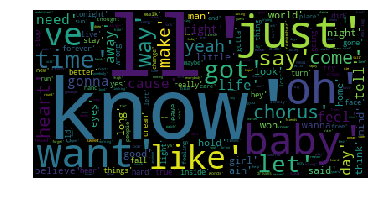

In [382]:
my_wordcloud = WordCloud().generate(str(word_set))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()



In [349]:
new_distance.head(5)

,1,2,3
0,0.070532,0.055205,0.237680
1,0.138527,0.017486,0.247913
2,0.054350,0.142887,0.212156
3,0.096800,0.194406,0.217393
4,0.102915,0.190221,0.200616


In [350]:
top5_document(1,new_distance)

,artist,song,link,text
40153,Kid Rock,Jesus And Bocephus,/k/kid+rock/jesus+and+bocephus_21094388.html,[Verse 1] \nSometimes I've had too much to dr...
41135,Lady Gaga,Stand By Me,/l/lady+gaga/stand+by+me_20457173.html,When the night has come \nAnd the land is dar...
7808,Hillsong United,All Things Are Possible,/h/hillsong+united/all+things+are+possible_206...,"Almighty God, my Redeemer, \nMy Hiding Place,..."
29589,Devo,Are You Experienced?,/d/devo/are+you+experienced_20039773.html,If you could just get your mind together \nTh...
43493,Men At Work,Everything I Need,/m/men+at+work/everything+i+need_20091695.html,Moving up and down and from side to side \nWi...


In [352]:
top5_document(2,new_distance)

,artist,song,link,text
41055,Kylie Minogue,Sleeping With The Enemy,/k/kylie+minogue/sleeping+with+the+enemy_21079...,I don't think you know that I hear you \nThat...
10766,Kirk Franklin,When I Get There,/k/kirk+franklin/when+i+get+there_20338695.html,[Verse 1:] \nThe sun will shine \nMy heart s...
9342,Jimmy Buffett,Landfall,/j/jimmy+buffett/landfall_20071890.html,Now what do they do if I just sailed away \nW...
6884,Glee,I'm The Only One,/g/glee/im+the+only+one_20990679.html,Please baby can't you see \nMy mind's a burni...
4247,Divine,It's About Time,/d/divine/its+about+time_20040855.html,It's about time \nIt's about time that you st...


In [383]:
top5_document(3,new_distance)

,artist,song,link,text
31783,Erasure,True Love Always,/e/erasure/true+love+always_20325971.html,Just you know why \nWhy you and I \nWill by ...
53145,Tim Buckley,I Must Have Been Blind,/t/tim+buckley/i+must+have+been+blind_20137243...,Here I am believin' words again \nHere I am t...
30644,Dusty Springfield,I Found Love With You,/d/dusty+springfield/i+found+love+with+you_200...,"I found it, I found it, ooh \nTrue, true lovi..."
54894,Various Artists,3 Doors Down - When I'm Gone,/v/various+artists/3+doors+down+when+im+gone_2...,There's another world inside of me \nThat you...
30696,Dusty Springfield,Never Love Again,/d/dusty+springfield/never+love+again_20043799...,Dear Lord above \nI swear that I \nI will ne...


Visualize the 3 clusters with 2 features

C:\Users\karen\Downloads\big tiger\python\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


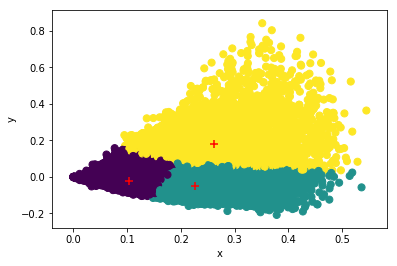

In [369]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(Z[:,0],Z[:,1],c=cluster,s=50)
for i,j in kmeans_3.cluster_centers_:
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()


In conclusion, if we only include two main features and separte the song data into 3 clusters, it is clear that firstly we try to distinguish that whether the songs have mentioned anything about 'love' . In addition, according to the word cloud, in these features for all components, "know","want","love","baby","gonna" etc gives us an explaination that the songs are written in a more romantic and encouraged way, therefore the encouragement and love would be the main theme for these songs and they are separted into 3 clusters based on the extent of this theme. For example, cluster 1 is the most positive and encouraged based on the text of the songs